In [217]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [218]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/phan%20thiet?key=TQ39TAZE5EZHHYRGNANAQ5JJB'
response = requests.get(url).json()


In [219]:
link = "D:/university/python_code/ttpython/code/myproject/data/phan_thiet.csv"

Text(0, 0.5, 'Index')

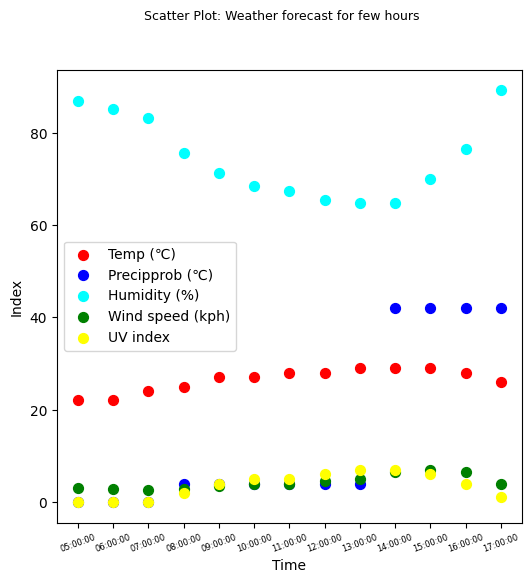

In [220]:
datetime = []
temp = []
humidity = []
windspeed = []
uvindex = []
datetime = []
precipprob =[]
fig , ax = plt.subplots(1, dpi=100, figsize=(6, 6), 
            sharey=True, facecolor='white')

for i in range(5,18):
    datetime.append(str(response["days"][0]["hours"][i]["datetime"]))
    temp.append(round(float((response["days"][0]["hours"][i]["temp"]-32)/1.8)))
    humidity.append(float(response["days"][0]["hours"][i]['humidity']))
    windspeed.append(float(response["days"][0]["hours"][i]['windspeed']))
    uvindex.append(float(response["days"][0]["hours"][i]['uvindex']))
    precipprob.append(int((response["days"][0]["hours"][i]['precipprob'])))

fig.suptitle('Scatter Plot: Weather forecast for few hours',size=9)
plt.scatter(datetime,temp, s=50, c='r', label='Temp (℃)')
plt.scatter(datetime,precipprob, s=50, c='blue', label='Precipprob (℃)')
plt.scatter(datetime,humidity,  s=50, c='#00ffff',label='Humidity (%)' )
plt.scatter(datetime,windspeed, s=50, c='green', label='Wind speed (kph)')
plt.scatter(datetime,uvindex, s=50, c='yellow', label='UV index')
plt.xticks(fontsize = 6, rotation = 20)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Index")   

Text(0, 0.5, 'Index')

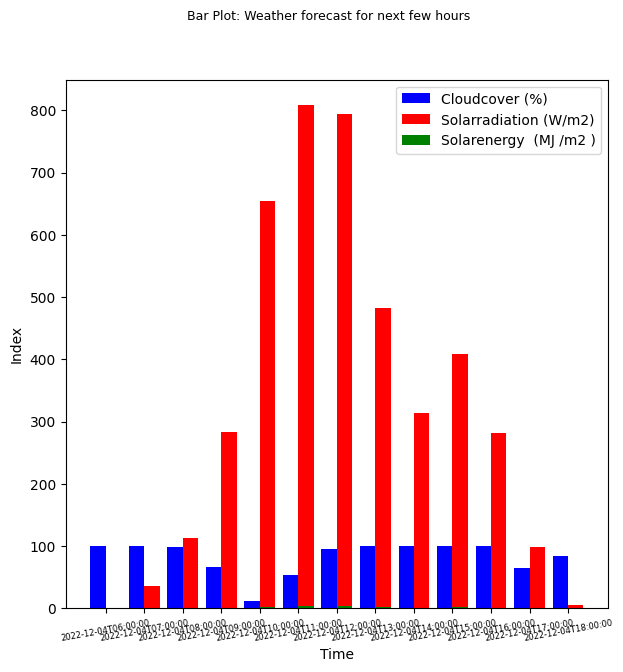

In [221]:
fig , ax = plt.subplots(1, dpi=100, figsize=(7, 7), 
            sharey=True, facecolor='white') 
            
df = pd.read_csv(link) 
fig.suptitle('Bar Plot: Weather forecast for next few hours',size=9)
plt.bar(df.iloc[6:19,1],df.iloc[6:19,15],width=-0.4,align='edge',color='b',label='Cloudcover (%)')
plt.bar(df.iloc[6:19,1],df.iloc[6:19,17],width=0.4,align='edge',color='r',label='Solarradiation (W/m2)')
plt.bar(df.iloc[6:19,1],df.iloc[6:19,18],width=0.4,align='edge',color='g',label='Solarenergy  (MJ /m2 )')
plt.legend(loc='best')
plt.xticks(fontsize = 6, rotation = 10)
plt.xlabel("Time")
plt.ylabel("Index") 

Text(0, 0.5, 'Index')

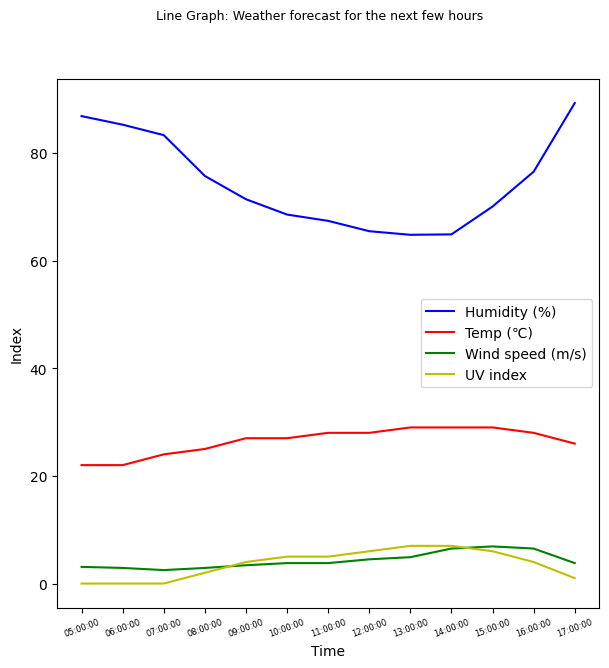

In [222]:
datetime = []
temp = []
humidity = []
windspeed = []
uvindex = []
datetime = []
for i in range(5,18):
    datetime.append(str(response["days"][0]["hours"][i]["datetime"]))
    temp.append(round(float((response["days"][0]["hours"][i]["temp"]-32)/1.8)))
    humidity.append(float(response["days"][0]["hours"][i]['humidity']))
    windspeed.append(float(response["days"][0]["hours"][i]['windspeed']))
    uvindex.append(float(response["days"][0]["hours"][i]['uvindex']))

fig , ax = plt.subplots(1, dpi=100, figsize=(7, 7), 
            sharey=True, facecolor='white') 
fig.suptitle('Line Graph: Weather forecast for the next few hours',size=9)
plt.plot(datetime, humidity, 'b', label='Humidity (%)')
plt.plot(datetime, temp, 'r', label='Temp (℃)')
plt.plot(datetime, windspeed, 'g', label='Wind speed (m/s)')
plt.plot(datetime,uvindex,'y', label="UV index")
plt.xticks(fontsize = 6, rotation = 20)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Index")   


Text(0.5, 0, 'uvindex')

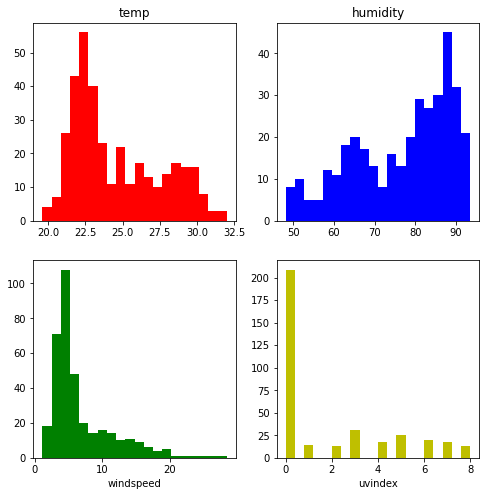

In [223]:

df = pd.read_csv(link)
fig = plt.figure(figsize=(8, 8))
# add thêm subplot vào vị trí thứ 1, figure được chia thành 2 hàng, 2 cột
ax1 = fig.add_subplot(2, 2, 1)

# add thêm subplot vào vị trí thứ 2, figure được chia thành 2 hàng, 2 cột
ax2 = fig.add_subplot(2, 2, 2)

# add thêm subplot vào vị trí thứ 3, figure được chia thành 2 hàng, 2 cột
ax3 = fig.add_subplot(2, 2, 3)

ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(list(df.iloc[:,2]), bins=20, color='r')
ax1.set_title("temp")
ax2.hist(list(df.iloc[:,5]), bins=20, color='b')
ax2.set_title("humidity")
ax3.hist(list(df.iloc[:,12]), bins=20, color='g')
ax3.set_xlabel("windspeed")
ax4.hist(list(df.iloc[:,19]), bins=20, color='y')
ax4.set_xlabel("uvindex")

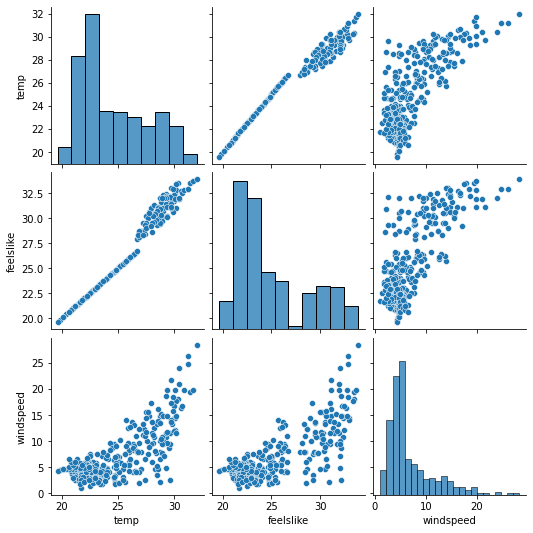

In [224]:
data_df = df[['temp','feelslike', 'windspeed']]
sns.pairplot(data_df)


Text(0, 0.5, 'Temp')

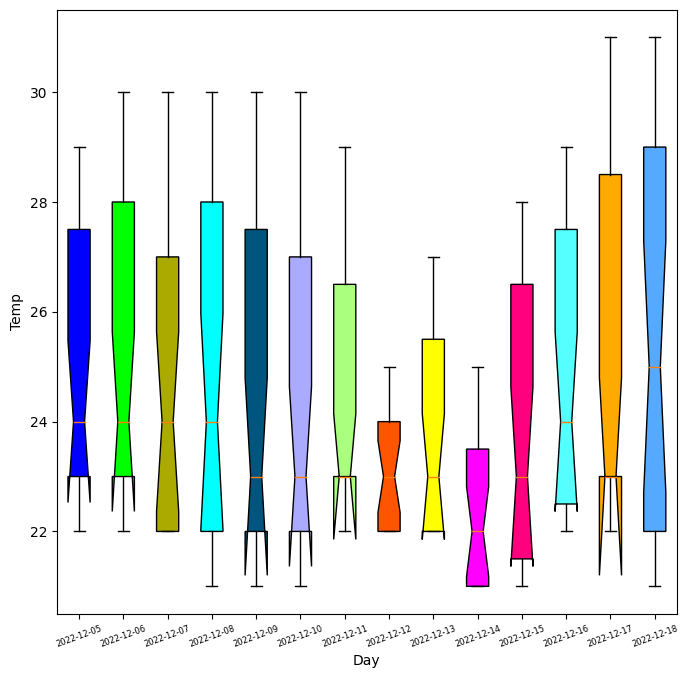

In [225]:
dist={}
colum = []
labels = []
temp = []
fig , ax = plt.subplots(1, dpi=100, figsize=(8, 8), 
            sharey=True, facecolor='white') 
for i in range(14):
    for j in range(23):
        temp.append(round(float((response["days"][i]["hours"][j]["temp"]-32)/1.8)))        
    dist[str(response["days"][i]["datetime"])] = temp
    temp = []

df= pd.DataFrame(dist)
for i in df.columns:
    labels.append(i)
    colum.append(df[i])
k =[]
for i in range(1,len(labels)+1):
    k.append(i)

box= ax.boxplot(colum, notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#aaaa00','#00ffff','#00557f','#aaaaff','#aaff7f',
            '#ff5500','#FFFF00', '#FF00FF','#ff007f','#55ffff','#ffaa00','#55aaff']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xticks(k,labels,fontsize = 6, rotation = 20)
plt.xlabel("Day")
plt.ylabel("Temp")

<AxesSubplot: >

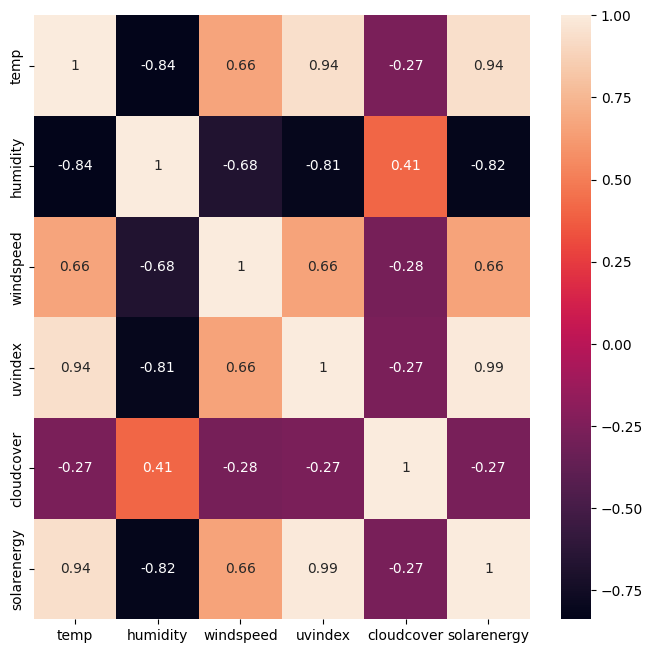

In [226]:
datetime = []
temp = []
humidity = []
windspeed = []
uvindex = []
fig , ax = plt.subplots(1, dpi=100, figsize=(8, 8), 
            sharey=True, facecolor='white') 

cloudcover=[]
solarenergy = []
feelslike = []
dist ={}
for j in range(15):
    for i in range(7,18):
        datetime.append(str(response["days"][j]["datetime"]))
        temp.append(round(float((response["days"][j]["hours"][i]["temp"]-32)/1.8)))
        humidity.append(float(response["days"][j]["hours"][i]['humidity']))
        windspeed.append(float(response["days"][j]["hours"][i]['windspeed']))
        uvindex.append(float(response["days"][j]["hours"][i]['uvindex']))
        cloudcover.append(float(response["days"][j]["hours"][i]['cloudcover']))
        solarenergy.append(float(response["days"][j]["hours"][i]['solarenergy']))
        feelslike.append(float(response["days"][j]["hours"][i]['solarenergy']))
             

dist['temp'] = temp
dist["humidity"] = humidity
dist["windspeed"] = windspeed
dist["uvindex"] = uvindex
dist["cloudcover"] = cloudcover
dist["solarenergy"] = solarenergy
df1 = pd.DataFrame(dist,index =datetime)

sns.heatmap(df1.corr(),annot=True)


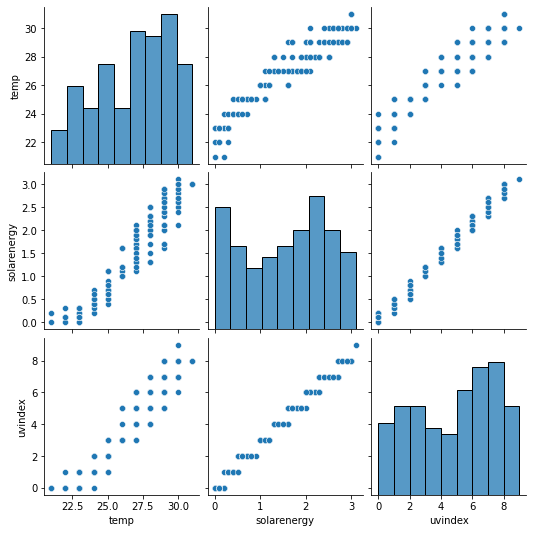

In [227]:
temp = []
uvindex = []
solarenergy=[]
for j in range(15):
    for i in range(7,17):
        temp.append(round(float((response["days"][j]["hours"][i]["temp"]-32)/1.8)))
        uvindex.append(float(response["days"][j]["hours"][i]['uvindex']))
        solarenergy.append(float(response["days"][j]["hours"][i]['solarenergy']))
dist1 ={}
dist1['temp'] = temp
dist1["solarenergy"] = solarenergy
dist1["uvindex"] = uvindex
data = pd.DataFrame(dist1)

# g = pd.plotting.scatter_matrix(data, figsize=(3,3), marker = 'o', hist_kwds = {'bins': 10}, s = 5, alpha = 0.5)
# # plt.xticks(fontsize = 5)
# # plt.yticks(fontsize = 5)
# plt.show()
sns.pairplot(data)